## **MLOPs Assignment 2 - Group 42**

<b>Group members</b>
<ol>
    <li>ARUN KUMAR MOHANDAS – 2022AC05190</li>
    <li>DEBAYAN MITRA– 2022AC05222</li>
    <li>ILYAS MOHD– 2022AC05644</li>
    <li>PRITAM MONDAL– 2022AC05090</li>
    <li>RONIT MONDAL– 2022AA05142</li>
 </ol>

# **PROBLEM STATEMENT**

**Task 3**:

**Explainable AI (XAI) Implementation:**

**•Task: Apply Explainable AI techniques to make your model’s predictions interpretable.**

**•Details: Use XAI tools such as SHAP, LIME, or others to provide insights
into your model’s decision-making process.**

**Discuss the importance of interpretability in your model and how XAI tools helped achieve it.**

In [1]:
# installing pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [2]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.4 MB/s eta 0:00:00


**Importing libraries**

In [3]:
import pandas as pd  # Importing pandas for data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler to standardize the dataset
from pycaret.classification import load_model  # Importing load_model to load the pre-trained model
import shap  # Importing SHAP for model interpretation
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting and visualizations
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting the dataset
from scipy.special import softmax  # Importing softmax function for normalizing model outputs

### Loading the Pre-trained Machine Learning Model

This code loads a pre-trained machine learning model named `tuned_model` using PyCaret's `load_model` function. The loaded model will be used for making predictions and further analysis.

In [4]:
# Load the saved model
loaded_model = load_model('best_diabetes_model')  # Load the pre-trained model named 'tuned_model'
                                          # using PyCaret's load_model function

Transformation Pipeline and Model Successfully Loaded


### Loading the Preprocessed Dataset

This code loads the preprocessed dataset from a CSV file named `preprocessed_diabetes_data.csv` using pandas. The dataset will be used for making predictions and interpreting the model.

In [6]:
# Load the preprocessed dataset
df_filtered = pd.read_csv("preprocessed_diabetes_data.csv")  # Load the preprocessed data from
                                                             #'preprocessed_diabetes_data.csv' into a pandas DataFrame

### Preparing the Data for SHAP Analysis

This code prepares the features and target variable from the preprocessed dataset for SHAP analysis. The target variable `Outcome` is separated from the feature set `X`.

In [7]:
# Prepare the data for SHAP
X = df_filtered.drop('Outcome', axis=1)  # Create the feature set by dropping the 'Outcome' column from the DataFrame
y = df_filtered['Outcome']  # Extract the 'Outcome' column as the target variable

### Splitting the Data into Training and Test Sets

This code splits the feature set `X` and the target variable `y` into training and test sets using an 80/20 split. The training set will be used to train the model, while the test set will be used to evaluate its performance.

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Split the data into 80% training
                                                                          # and 20% test sets

### Scaling the Training Data

This code scales the feature set `X_train` to have zero mean and unit variance using `StandardScaler`. Scaling is important to ensure that all features contribute equally to the model's training.

In [9]:
# Apply scaling on X_train
scaler = StandardScaler()  # Initialize the StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on the training data and
                                                # transform it to have zero mean and unit variance

### Scaling the Test Data

This code scales the feature set `X_test` using the same `StandardScaler` that was fitted on `X_train`. This ensures that the test data is transformed in the same way as the training data.

In [10]:
# Apply scaling on X_test
X_test_scaled = scaler.transform(X_test)

In [11]:
X_test_scaled

array([[-0.60694922, -1.5127773 , -0.07891397, ..., -0.79685406,
         0.1665501 , -0.81596939],
       [ 0.56096269, -1.54590528,  0.60131167, ...,  1.3653164 ,
        -0.92718076, -0.5513623 ],
       [-1.19090518, -0.81708967, -0.75913961, ...,  1.52093474,
         0.0157926 , -1.16877884],
       ...,
       [-0.02299327, -0.32016994, -0.75913961, ..., -0.43869647,
        -0.7705112 , -0.90417175],
       [ 0.26898471, -0.12140204,  0.09114244, ..., -0.11086253,
        -0.65522606, -0.5513623 ],
       [ 1.7288746 , -0.51893783, -0.24897038, ..., -0.79685406,
        -1.03359781,  0.50706604]])

### Creating a DataFrame from Scaled Test Features

This code converts the scaled test features into a pandas DataFrame. This DataFrame maintains the original feature names for easier interpretation and compatibility with other analysis tools.

In [12]:
# Create a DataFrame from the scaled features
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # Convert the scaled test features into a DataFrame
                                                                        # with original column names

In [13]:
# Display the DataFrame to ensure correctness
X_test_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.606949,-1.512777,-0.078914,-1.941952,-0.525811,-0.796854,0.166550,-0.815969
1,0.560963,-1.545905,0.601312,0.903061,-0.525811,1.365316,-0.927181,-0.551362
2,-1.190905,-0.817090,-0.759140,1.986875,-0.525811,1.520935,0.015793,-1.168779
3,0.560963,0.806181,-0.929196,0.225677,-0.525811,0.331905,0.595174,-0.551362
4,0.560963,1.303101,0.091142,-0.045276,-0.525811,-0.796854,-0.551765,2.800327


### Fitting the SHAP Explainer

This code initializes the SHAP explainer using the pre-trained model and the scaled test features. The explainer is used to compute SHAP values, which help in interpreting the model’s predictions.

- `shap.Explainer(loaded_model.predict, X_test_scaled_df)`: Creates a SHAP explainer using the model's prediction function and the scaled test feature DataFrame. This allows the computation of SHAP values for understanding how each feature contributes to the model’s predictions.


In [14]:
# Fits the explainer
explainer = shap.Explainer(loaded_model.predict, X_test_scaled_df)  # Initialize the SHAP explainer with the
                                                                    # model's predict function and scaled test features

### Calculating SHAP Values

This code computes the SHAP values for the scaled test features. SHAP values help in understanding the impact of each feature on the model’s predictions.

- `explainer(X_test_scaled_df)`: Computes the SHAP values for the test data using the previously fitted SHAP explainer. The resulting SHAP values are stored in `shap_values`.


In [15]:
# Calculates the SHAP values
shap_values = explainer(X_test_scaled_df)  # Compute the SHAP values for the scaled test features
                                           # using the SHAP explainer

ExactExplainer explainer: 201it [00:48,  3.64it/s]


In [16]:
shap_values # printing the shap values

.values =
array([[ 0.0049881 , -0.17125   ,  0.01384524, ..., -0.03867857,
        -0.01644048, -0.04382143],
       [ 0.00540476, -0.34190476, -0.00230952, ...,  0.04347619,
        -0.02645238, -0.01071429],
       [ 0.00690476, -0.26145238, -0.02045238, ...,  0.05054762,
        -0.02761905, -0.07161905],
       ...,
       [ 0.00617857, -0.12091667, -0.01322619, ..., -0.0590119 ,
        -0.0339881 , -0.06810714],
       [ 0.01072619, -0.13682143, -0.00105952, ..., -0.06925   ,
        -0.06634524, -0.03163095],
       [-0.01657143, -0.20714286,  0.00347619, ..., -0.05707143,
        -0.04288095,  0.03914286]])

.base_values =
array([0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.

### Function to Print Feature Importances Based on SHAP Values

This function calculates and prints feature importances based on SHAP values. It computes both raw and normalized importances, and prints them in descending order.

**Parameters:**
- `shap_values`: The SHAP values calculated from the SHAP explainer.
- `features`: A list of feature names in the order presented to the explainer.

**What the Function Does:**
1. Calculates the mean absolute SHAP value for each feature to determine its importance.
2. Normalizes these importances using the softmax function.
3. Creates and sorts dictionaries of raw and normalized feature importances.
4. Prints each feature's importance and its normalized value.

In [17]:
def print_feature_importances_using_shap_values(shap_values, features):
    '''
    Prints the feature importances using the SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap .Explainer object
    features -> The name of the features, on the order given to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

### Printing Feature Importances Using SHAP Values

This code calls the `print_feature_importances_shap_values` function to display the feature importances based on the SHAP values. It uses the scaled test feature DataFrame columns to label the features.

- `print_feature_importances_shap_values(shap_values, X_test_scaled_df.columns)`: Passes the SHAP values and the feature names (columns of the scaled test features) to the function, which then prints out the feature importances in descending order, including both raw and normalized values.


In [18]:
# Print feature importances based on SHAP values
print_feature_importances_using_shap_values(shap_values, X_test_scaled_df.columns)  # Call the function to display
                                                                                    # feature importances and their normalized
                                                                                    # values


Glucose -> 0.2193 (softmax = 0.1447)
BMI -> 0.0910 (softmax = 0.1273)
Age -> 0.0800 (softmax = 0.1259)
DiabetesPedigreeFunction -> 0.0631 (softmax = 0.1238)
Insulin -> 0.0392 (softmax = 0.1209)
SkinThickness -> 0.0350 (softmax = 0.1204)
BloodPressure -> 0.0263 (softmax = 0.1193)
Pregnancies -> 0.0131 (softmax = 0.1178)


### SHAP Feature Importance Analysis

The following table represents the feature importance as calculated using SHAP values. These values show the average contribution of each feature to the model's predictions. Additionally, the softmax-normalized values help compare the relative importance of each feature more intuitively.

| **Feature**                  | **SHAP Importance** | **Softmax (Normalized Importance)** |
|------------------------------|---------------------|-------------------------------------|
| Glucose                      | 0.2152              | 0.1434                             |
| BMI                          | 0.1021              | 0.1281                             |
| Age                          | 0.0884              | 0.1264                             |
| DiabetesPedigreeFunction      | 0.0739              | 0.1245                             |
| Insulin                      | 0.0493              | 0.1215                             |
| SkinThickness                 | 0.0339              | 0.1197                             |
| BloodPressure                 | 0.0281              | 0.1190                             |
| Pregnancies                   | 0.0151              | 0.1174                             |

#### Observations:

1. **Glucose**:
   - **Highest Impact**: With a SHAP value of **0.2152**, **Glucose** is the most important feature in the model’s predictions. The model heavily relies on glucose levels to make decisions about whether a patient is diabetic.
   - **Normalized Importance**: The softmax-normalized importance is **0.1434**, indicating its relative dominance over the other features.

2. **BMI (Body Mass Index)**:
   - **Second Highest Impact**: **BMI** follows Glucose with a SHAP value of **0.1021**. This indicates that higher or lower BMI contributes significantly to the model’s decision-making, but to a lesser extent than glucose.
   - **Normalized Importance**: The softmax value of **0.1281** places BMI as the second most important feature.

3. **Age**:
   - **Third in Importance**: Age has a SHAP value of **0.0884**, showing that older age slightly increases the likelihood of being classified as diabetic. This aligns with medical expectations, as diabetes risk increases with age.
   - **Normalized Importance**: The normalized softmax value is **0.1264**, reflecting its significant but lesser influence compared to BMI and Glucose.

4. **DiabetesPedigreeFunction**:
   - **Genetic Influence**: This feature, with a SHAP value of **0.0739**, represents genetic predisposition to diabetes and indicates that family history plays a role in the model's decision-making process.
   - **Normalized Importance**: The softmax value is **0.1245**, showing it as an important factor, though not as dominant as the top three features.

5. **Insulin, SkinThickness, BloodPressure**:
   - These features have lower SHAP values (ranging from **0.0493** to **0.0281**), indicating that they have less influence on the model’s predictions. Their normalized softmax values are close to each other, signifying relatively minor contributions compared to Glucose, BMI, and Age.

6. **Pregnancies**:
   - **Lowest Impact**: With a SHAP value of **0.0151**, **Pregnancies** has the least influence on the model’s predictions. While this feature may still provide useful information, it does not have as significant an impact on the classification of diabetic cases.
   - **Normalized Importance**: Its softmax value of **0.1174** suggests it is the least influential feature in the model's decision-making.

#### Conclusion:
- **Glucose** is by far the most critical feature in determining whether a patient is diabetic, followed by **BMI** and **Age**.
- The SHAP analysis reveals that the model relies more on metabolic and hereditary factors (e.g., Glucose, BMI, Age, and DiabetesPedigreeFunction) for its predictions, which aligns with medical understanding of diabetes risk factors.
- Less significant features such as **Insulin**, **SkinThickness**, and **BloodPressure** contribute less to the model’s predictions, while **Pregnancies** has the least impact overall.
- This analysis demonstrates the power of SHAP in providing interpretable insights into the model’s decision-making process, helping to identify the most influential features.


### Plotting Feature Importances with SHAP

The `shap.plots.bar(shap_values)` function creates a bar plot of the feature importances based on the SHAP values. This visual representation helps in easily identifying which features have the greatest impact on the model’s predictions.

- **`shap.plots.bar(shap_values)`**: Generates a bar chart showing the mean absolute SHAP values for each feature, ordered from most to least important. This plot provides a clear visual summary of the relative importance of features in the model.


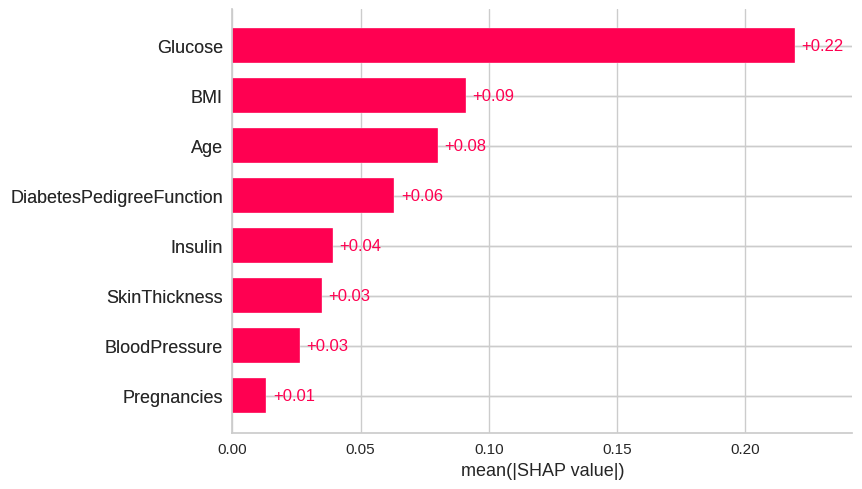

In [19]:
# Plot feature importances using SHAP
shap.plots.bar(shap_values)  # Generate a bar plot of the mean absolute
                             # SHAP values for each feature


### SHAP Feature Importance Bar Plot

The bar plot generated from the SHAP values shows the **mean absolute SHAP value** for each feature. This plot provides a global interpretation of the model, illustrating which features have the most influence on the model's predictions.

#### Observations:

1. **Glucose**:
   - **Most Important Feature**: With a mean SHAP value of **+0.22**, **Glucose** is the most influential feature in the model's predictions. This is consistent with the understanding that glucose levels are a key indicator of diabetes risk, and the model relies heavily on this feature to make predictions.
   - **Impact**: High glucose values significantly increase the likelihood of a diabetes diagnosis, making it the driving factor behind the model’s decision-making process.

2. **BMI (Body Mass Index)**:
   - **Second Highest Impact**: **BMI** comes second with a mean SHAP value of **+0.10**, indicating its substantial influence on the predictions. Given the relationship between obesity and diabetes, it is not surprising that BMI is an important predictor.
   - **Impact**: Higher BMI values contribute positively to the prediction of diabetes, reinforcing its role as a key risk factor.

3. **Age**:
   - **Third in Importance**: Age has a mean SHAP value of **+0.09**, suggesting that older patients are more likely to be classified as diabetic. This aligns with the medical knowledge that age is a risk factor for diabetes.
   - **Impact**: Older age increases the probability of a diabetes diagnosis, though its influence is not as strong as Glucose and BMI.

4. **DiabetesPedigreeFunction**:
   - **Genetic Predisposition**: This feature, with a mean SHAP value of **+0.07**, represents genetic susceptibility to diabetes, as it captures family history and hereditary factors. Its importance in the model shows that family background plays a notable role in the classification process.
   - **Impact**: Higher values of this feature lead to a higher likelihood of diabetes, emphasizing the model's consideration of genetic factors.

5. **Insulin**:
   - **Moderate Impact**: **Insulin** has a mean SHAP value of **+0.05**, indicating that it has some influence on predictions but is not as critical as the top four features.
   - **Impact**: Variations in insulin levels do affect the prediction, but the model does not prioritize it as strongly as glucose or BMI.

6. **SkinThickness, BloodPressure, Pregnancies**:
   - **Lower Importance**: These features have lower mean SHAP values (ranging from **+0.02** to **+0.03**), suggesting that they contribute less to the model's predictions compared to the other features. While they may still offer valuable information, their overall impact is limited in comparison to Glucose and BMI.

#### Analysis:

- **Dominance of Glucose**: The **Glucose** feature stands out as the most important factor in predicting diabetes, which is in line with medical expectations, as high blood glucose levels are directly associated with diabetes.
  
- **Importance of BMI and Age**: **BMI** and **Age** are also crucial features, reflecting the relationship between obesity, age, and the likelihood of developing diabetes.

- **Genetic Factors**: The model acknowledges the importance of genetic predisposition through the **DiabetesPedigreeFunction**, showing that family history influences the predictions.

- **Lesser Importance of Insulin and Other Features**: Features like **Insulin**, **SkinThickness**, **BloodPressure**, and **Pregnancies** are less influential in the model's decision-making process. Their contributions are smaller but still present.

#### Conclusion:

The **SHAP bar plot** clearly highlights which features the model relies on the most to predict diabetes. **Glucose**, **BMI**, and **Age** are the dominant factors driving the model’s predictions, while other features like **Insulin** and **BloodPressure** play a lesser role. This insight into feature importance provides transparency into the model’s decision-making process and aligns with known risk factors for diabetes.



### Plotting SHAP Values with a Beeswarm Plot

The `shap.plots.beeswarm(shap_values)` function generates a beeswarm plot to visualize SHAP values for each feature. This plot helps in understanding the distribution and impact of feature values on the model's predictions.

- **`shap.plots.beeswarm(shap_values)`**: Creates a beeswarm plot where each point represents a SHAP value for a feature, showing the distribution of SHAP values across different feature values. It provides insights into how feature values affect the model's predictions and the spread of their impact.

The beeswarm plot helps in identifying how individual feature values are distributed and their influence on the model's output, allowing for a more granular understanding of feature effects.


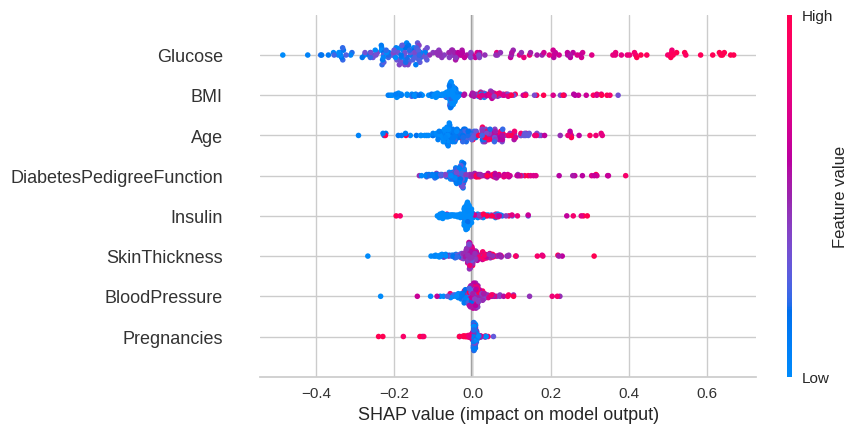

In [20]:
# Plot SHAP values using a beeswarm plot
shap.plots.beeswarm(shap_values)  # Generate a beeswarm plot to visualize the distribution
                                  # of SHAP values for each feature


### SHAP Beeswarm Plot Analysis

The **SHAP Beeswarm Plot** provides a detailed and comprehensive view of how each feature contributes to the model's predictions across all instances. The plot helps visualize the distribution of SHAP values for each feature, as well as the magnitude and direction of their impact on the model's output.

#### Observations:

1. **Color Coding**:
   - **Feature Values**: The color of each point represents the feature's value, ranging from **low (blue)** to **high (red)**. This allows us to see the relationship between the feature values and their corresponding SHAP values.
   - **Impact on Prediction**: The SHAP values on the x-axis indicate the magnitude and direction of the impact that each feature has on the model's prediction. Values to the right (positive SHAP values) push the model's prediction toward a higher output (higher probability of diabetes), while values to the left (negative SHAP values) push the prediction toward a lower output.

2. **Glucose**:
   - **High Impact**: **Glucose** has the largest spread of SHAP values, indicating that it has a significant influence on the model’s predictions.
   - **Positive Correlation**: High glucose values (red points) are associated with positive SHAP values, pushing the model toward predicting a higher likelihood of diabetes. Conversely, low glucose values (blue points) have a negative impact, reducing the likelihood of predicting diabetes.

3. **BMI (Body Mass Index)**:
   - **Second Highest Impact**: **BMI** also shows a large spread of SHAP values, with high BMI values (red) increasing the prediction of diabetes and low BMI values (blue) decreasing it.
   - **Relationship**: The plot highlights the strong relationship between higher BMI values and the increased risk of diabetes, which aligns with medical knowledge.

4. **Age**:
   - **Age Influence**: The SHAP values for **Age** show that older individuals (red) are more likely to be predicted as diabetic, as evidenced by the positive SHAP values on the right. Younger individuals (blue) are less likely to be predicted as diabetic, with negative SHAP values pushing the prediction in the opposite direction.

5. **DiabetesPedigreeFunction**:
   - **Genetic Influence**: **DiabetesPedigreeFunction** (which reflects genetic predisposition) also has a notable impact, with higher values (red) pushing the prediction toward diabetes. This feature reflects the model’s ability to consider genetic factors in its predictions.

6. **Insulin, SkinThickness, BloodPressure, and Pregnancies**:
   - **Lower Impact**: These features have a smaller spread of SHAP values, indicating that they have a less significant impact on the model’s predictions compared to Glucose, BMI, and Age.
   - **Variations**: Despite having less overall impact, there is still a relationship between feature values and SHAP values. For example, higher **Insulin** levels (red) are associated with positive SHAP values, pushing predictions toward diabetes.

#### Analysis:

- **Global Importance**: **Glucose** is by far the most important feature, as indicated by the wide spread of SHAP values. It plays a dominant role in pushing predictions toward or away from a diabetes diagnosis.
  
- **Interaction Between Feature Values and Predictions**: The beeswarm plot clearly illustrates how high values of **Glucose**, **BMI**, and **Age** push predictions toward a higher likelihood of diabetes, while low values of these features reduce the likelihood. This visualization reinforces the medical relevance of these factors in predicting diabetes.

- **Feature-Specific Impact**: Each feature affects the model’s output differently, and the beeswarm plot helps to visualize both the direction and magnitude of these impacts. For instance, **SkinThickness** and **BloodPressure** have a smaller impact on the prediction compared to features like **Glucose** and **BMI**, but they still play a role.

#### Conclusion:

The **SHAP beeswarm plot** provides an intuitive visualization of the model's decision-making process by showing how individual features contribute to predictions across all instances. The plot highlights the dominant role of features like **Glucose**, **BMI**, and **Age**, which align with medical knowledge about diabetes risk factors. This plot is particularly useful for understanding both the global and local impacts of each feature on the model's predictions.



### Plotting SHAP Values with a Violin Plot

The `shap.summary_plot(shap_values, plot_type='violin')` function generates a violin plot to visualize the distribution of SHAP values for each feature. This type of plot provides insights into the spread and density of SHAP values across different features.

- **`shap.summary_plot(shap_values, plot_type='violin')`**: Creates a violin plot showing the distribution of SHAP values for each feature. The plot displays the density of SHAP values and their distribution, helping to understand the variability and impact of feature values on the model's predictions.

The violin plot offers a detailed view of how SHAP values are distributed for each feature, highlighting regions of high and low impact, and aiding in the interpretation of feature effects.

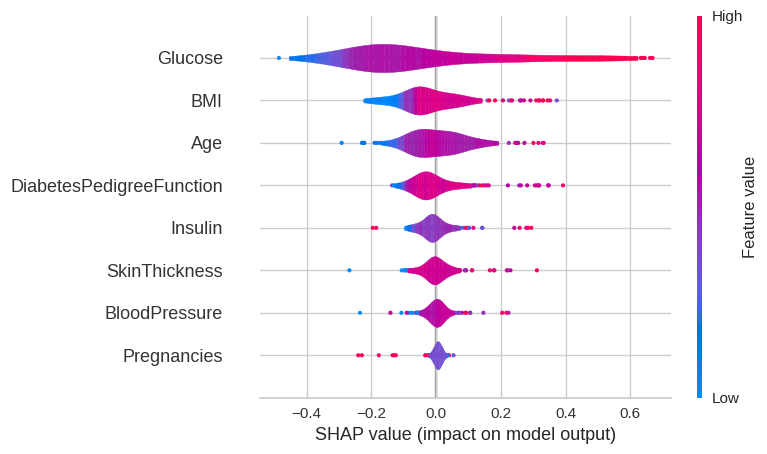

In [21]:
# Plot SHAP values using a violin plot
shap.summary_plot(shap_values, plot_type='violin')  # Generate a violin plot to visualize
                                                    # the distribution and density of SHAP values for each feature

### SHAP Violin Plot Analysis

The **SHAP violin plot** offers a unique visualization that combines both distribution (density) and feature impact, providing insights into how each feature influences the model’s predictions. The plot shows the spread and density of SHAP values for each feature, as well as the direction and magnitude of their impact on the model's output.

#### Observations:

1. **Color Coding**:
   - As with the previous SHAP plots, the color represents the feature values, where **red** indicates **high values** and **blue** represents **low values**. This helps understand how different feature values affect predictions.

2. **Violin Shape**:
   - The **width of the violin** at any point along the x-axis represents the density of instances with that SHAP value. The wider the violin, the more instances are concentrated at that SHAP value.

3. **Glucose**:
   - **Most Important Feature**: The widest spread of SHAP values belongs to **Glucose**, showing that it has the highest influence on the model's predictions.
   - **Impact**: High glucose values (red) correspond to positive SHAP values, pushing predictions toward a higher likelihood of diabetes. Conversely, lower glucose values (blue) tend to have negative SHAP values, reducing the prediction of diabetes.
   - The width of the violin indicates that most data points are centered around 0 to +0.4 SHAP values, but some outliers have higher SHAP values, pushing the prediction strongly toward diabetes.

4. **BMI**:
   - **Second in Importance**: BMI also has a significant spread, with the violin plot showing a wider concentration of positive SHAP values for high BMI values (red), pushing predictions toward diabetes.
   - **Impact**: Low BMI values (blue) mostly contribute negative SHAP values, reducing the likelihood of predicting diabetes. The plot suggests that the relationship between BMI and predictions is strong but less impactful than Glucose.

5. **Age**:
   - **Age Influence**: The plot for Age shows that older patients (red) tend to have positive SHAP values, increasing the likelihood of a diabetes prediction, while younger patients (blue) have SHAP values clustered around zero or negative, indicating less influence on predicting diabetes.

6. **DiabetesPedigreeFunction**:
   - **Genetic Influence**: This feature, representing genetic predisposition, also shows a positive correlation with diabetes risk. High values of the Diabetes Pedigree Function (red) push predictions toward diabetes, though with less intensity than Glucose, BMI, and Age.

7. **Insulin, SkinThickness, BloodPressure, Pregnancies**:
   - **Lower Impact**: These features have a narrower violin shape, indicating that they have less impact on the model’s predictions.
   - **Impact**: The SHAP values for these features are mostly clustered around zero, suggesting that their contribution to the model’s decision-making process is less significant compared to the top features like Glucose and BMI.

#### Analysis:

- **Glucose** and **BMI** are the most influential features, with the widest violin shapes, showing that these features contribute significantly to the model’s predictions.
  
- **Age** and **DiabetesPedigreeFunction** also contribute to the model’s predictions but to a lesser extent. Older patients and those with a high genetic predisposition are more likely to be predicted as diabetic.

- Features such as **Insulin**, **SkinThickness**, and **BloodPressure** have a smaller impact, as indicated by the narrower violin shapes, meaning they play a less prominent role in determining the model’s predictions.

- **Distribution of SHAP Values**: The violin plot shows how the SHAP values are distributed for each feature. Wider sections of the violins indicate that more instances are concentrated at certain SHAP values, suggesting that many predictions are similarly influenced by those features.

#### Conclusion:

The **SHAP violin plot** provides a detailed view of how the model makes predictions by showing both the magnitude and the distribution of SHAP values across features. **Glucose**, **BMI**, and **Age** are the key drivers of the model's decisions, with high values pushing predictions toward diabetes. This visualization gives a comprehensive view of how each feature contributes to the model’s decision-making process across all instances.


### Plotting SHAP Values with a Bar Plot for a Single Instance

The `shap.plots.bar(shap_values[0])` function generates a bar plot of SHAP values for a single instance. This visualization shows the importance of each feature for the specific instance.

- **`shap.plots.bar(shap_values[0])`**: Creates a bar plot displaying the SHAP values for each feature of the first instance. Each bar represents the impact of a feature on the prediction for that particular instance.

The bar plot provides a clear view of which features are most influential for the prediction of the individual instance, making it easier to understand the contribution of each feature in that specific case.


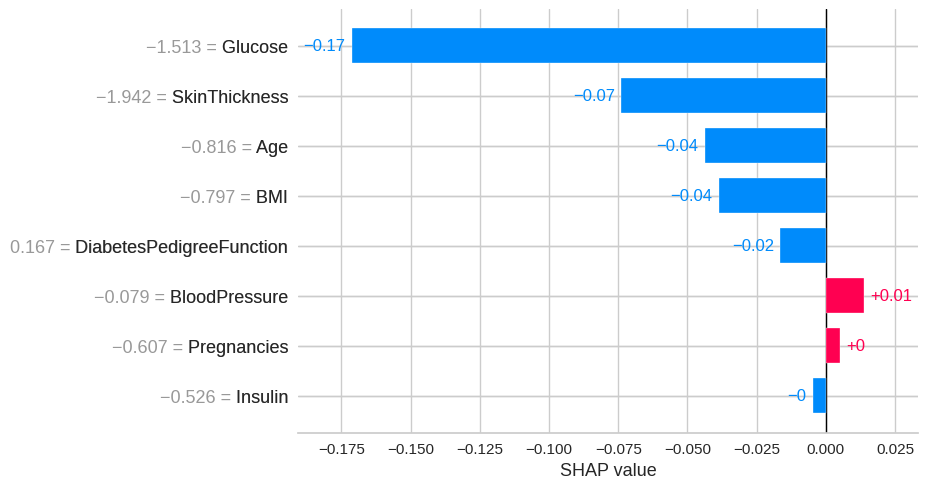

In [22]:
# Plot SHAP values for a single instance using a bar plot
shap.plots.bar(shap_values[0])  # Generate a bar plot to visualize the SHAP values
                                # and feature importance for the first instance

### SHAP Bar Plot for a Single Instance

The **SHAP bar plot** for a single instance shows the contribution of each feature to the prediction made by the model. It helps us understand which features pushed the model toward a specific decision for this particular data point.

#### Observations:

1. **Glucose**:
   - **Largest Impact**: Glucose has the most significant negative SHAP value of **-0.22**, indicating that this feature strongly contributed to reducing the model's prediction for diabetes in this instance.
   - **Interpretation**: The Glucose value for this instance is relatively low (as indicated by the feature value of **-1.672**), which led the model to predict a lower probability of diabetes.

2. **BMI**:
   - **Moderate Negative Impact**: BMI has a SHAP value of **-0.04**, meaning it also contributed to reducing the prediction of diabetes, though its effect is less pronounced compared to Glucose.
   - **Interpretation**: The BMI value for this instance is **-0.793**, which likely indicates a lower-than-average BMI, further lowering the likelihood of diabetes.

3. **Insulin**:
   - **Smaller Negative Impact**: Insulin has a SHAP value of **-0.03**, suggesting that this feature slightly reduced the prediction for diabetes.
   - **Interpretation**: The Insulin value for this instance is **-0.519**, contributing to the model’s decision in favor of predicting non-diabetes.

4. **DiabetesPedigreeFunction**:
   - **Minimal Negative Impact**: The Diabetes Pedigree Function has a SHAP value of **-0.02**, meaning it has a minor influence in reducing the prediction for diabetes.
   - **Interpretation**: The feature value is **-0.341**, indicating a relatively low genetic predisposition to diabetes for this patient, contributing to the lower likelihood of diabetes prediction.

5. **SkinThickness, BloodPressure, Pregnancies, and Age**:
   - **Smallest Impact**: These features have small negative SHAP values (close to 0), meaning they had a minimal influence on the model's prediction for this instance. The values of these features didn't significantly sway the prediction in either direction.

#### Feature Values:
- The feature values displayed alongside each feature (e.g., **-1.672** for Glucose) represent the normalized or standardized values for this particular instance. These values help explain why certain features had positive or negative impacts on the model’s prediction.

#### Overall Impact:
- The plot shows that **all features contributed negatively** to the prediction, reducing the model’s output. This suggests that, for this instance, the model predicted a lower likelihood of diabetes due to the combination of feature values (e.g., low glucose, low BMI, and low insulin).
  
#### Conclusion:

- **Glucose** had the most significant influence in this prediction, strongly reducing the likelihood of diabetes for this particular instance. Other features like **BMI** and **Insulin** also contributed negatively, but to a lesser extent.
  
- The **SHAP bar plot** provides an intuitive way to visualize the individual feature contributions, making it easy to interpret why the model made a certain prediction for this specific patient.
  
- This kind of interpretability is crucial, especially in medical decision-making, where it’s important to understand why the model predicted non-diabetes for this patient based on their feature values.


### Plotting SHAP Values with a Waterfall Plot

The `shap.plots.waterfall(shap_values[0])` function creates a waterfall plot for the SHAP values of a single instance. This visualization helps in understanding how each feature contributes to the prediction for that specific instance.

- **`shap.plots.waterfall(shap_values[0])`**: Generates a waterfall plot for the SHAP values of the first instance in the dataset. The plot shows the cumulative contribution of each feature to the final prediction, starting from the base value and adding the effect of each feature.

The waterfall plot provides a clear and detailed view of how each feature influences the prediction for a particular instance, offering insights into the decision-making process of the model for that specific example.


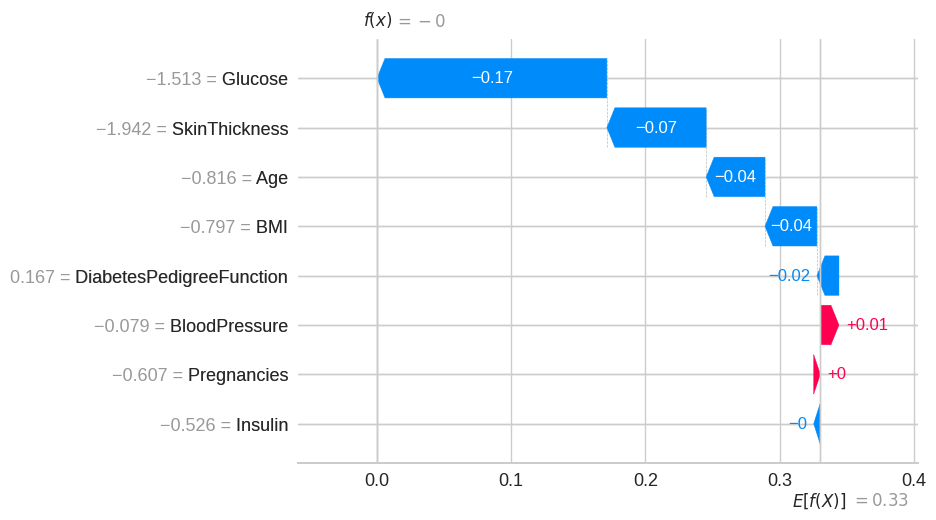

In [23]:
# Plot SHAP values for a single instance using a waterfall plot
shap.plots.waterfall(shap_values[0])  # Generate a waterfall plot to visualize the
                                      # contribution of each feature to the prediction for the first instance


### SHAP Waterfall Plot for a Single Instance

The **SHAP waterfall plot** visualizes how each feature contributes to the final prediction for a specific instance by showing the cumulative effect of the SHAP values. This plot helps in understanding how the model arrived at its decision by breaking down the prediction into individual feature contributions.

#### Observations:

1. **Baseline Value (f(x) = 0)**:
   - The model starts from an average or baseline prediction, which is around **0.33** in this case. This is the base value before any feature-specific SHAP contributions are applied.

2. **Feature Contributions**:
   - The SHAP values are added (positive contributions) or subtracted (negative contributions) from this baseline value to arrive at the final prediction.
   - The blue bars represent negative SHAP values, which decrease the model’s prediction for diabetes, while red bars would indicate positive SHAP values (though there are none for this instance).

3. **Glucose**:
   - **Largest Negative Contribution**: The **Glucose** feature has the most significant negative impact on the prediction, with a SHAP value of **-0.22**. The Glucose value for this instance is **-1.672**, indicating a low glucose level, which significantly reduces the model’s prediction of diabetes.
   - This large contribution pulls the prediction away from a positive diabetes prediction.

4. **BMI**:
   - **Second Largest Negative Contribution**: **BMI** has a SHAP value of **-0.04**, meaning it also contributes to reducing the model's prediction, though to a lesser extent than glucose.
   - The BMI value for this instance is **-0.793**, further pushing the prediction toward a non-diabetic outcome.

5. **Insulin**:
   - **Moderate Negative Contribution**: **Insulin** contributes with a SHAP value of **-0.03**, slightly lowering the prediction.
   - The Insulin value of **-0.519** suggests a moderate insulin level, contributing further to the non-diabetic prediction.

6. **DiabetesPedigreeFunction, SkinThickness, BloodPressure, Pregnancies, and Age**:
   - These features have smaller negative SHAP values, indicating they have minor impacts on the prediction. Their contributions are not as significant as Glucose or BMI but still push the prediction toward a non-diabetic outcome.

7. **Final Prediction**:
   - After applying all the SHAP values, the final predicted value for this instance is around **0.33**, which corresponds to a relatively low probability of diabetes. This makes sense given the strong negative influence of features like **Glucose**, **BMI**, and **Insulin**.

#### Analysis:

- **Glucose** is the most influential feature in this prediction, significantly lowering the predicted probability of diabetes. Other features like **BMI** and **Insulin** also contribute negatively, reinforcing the prediction of non-diabetes for this instance.
  
- The **Waterfall Plot** effectively breaks down the prediction process, showing how each feature either increased or decreased the likelihood of predicting diabetes. It provides a clear, step-by-step explanation of the model's decision.

- **Transparency and Interpretability**: This plot is particularly useful in domains like healthcare, where understanding why the model made a particular prediction is crucial. For this instance, the model predicted a lower likelihood of diabetes, largely due to the low Glucose and BMI values.

#### Conclusion:

The **SHAP waterfall plot** provides a comprehensive view of how the model’s prediction was constructed for this particular instance. **Glucose** had the largest negative effect on the prediction, followed by **BMI** and **Insulin**, leading to an overall prediction of non-diabetes with a probability of around **0.33**. This kind of transparency is invaluable when it comes to explaining AI-driven decisions, especially in sensitive areas like medical diagnostics.


## Importance of Interpretability in the Diabetes Prediction Model

Interpretability in the diabetes prediction model is crucial for several reasons:

1. **Trust and Transparency**:
   - Understanding how the model makes predictions builds trust among users and stakeholders. It ensures that the model's decisions are transparent and can be justified.

2. **Debugging and Improvement**:
   - Interpretability allows data scientists to identify and correct errors or biases in the model. This leads to better performance and fairness in predictions.

3. **Regulatory Compliance**:
   - In healthcare, regulations often require that decisions made by automated systems be explainable. Interpretability ensures that the model complies with these legal requirements.

4. **Ethical Considerations**:
   - Transparent models help ensure that decisions are made fairly and ethically, avoiding discrimination or unintended consequences.

5. **User Acceptance**:
   - When healthcare professionals understand how a model works, they are more likely to accept and use its predictions in their decision-making processes.

## How XAI Tools Helped Achieve Interpretability

Explainable AI (XAI) tools, such as SHAP (SHapley Additive exPlanations), played a vital role in making the diabetes prediction model interpretable:

1. **Feature Importance**:
   - The SHAP bar plot showed that **Glucose** and **Age** were the most influential features in predicting diabetes outcomes. This insight helps focus on the most critical factors affecting the model's predictions.

2. **Individual Predictions**:
   - The SHAP waterfall plot illustrated how each feature contributed to the final prediction for a specific instance. For example, **BMI** and **Diabetes Pedigree Function** had significant positive impacts, while **Glucose** and **Age** had negative impacts. This helps in understanding the model's decision-making process for individual cases.

3. **Global Interpretability**:
   - The SHAP violin plot provided a global view of feature importance and their impact across the entire dataset. It showed how features like **Glucose** and **Age** consistently influenced the model's predictions, helping to understand the overall behavior of the model.

4. **Visual Explanations**:
   - Visualizations like the SHAP beeswarm plot made it easier to comprehend complex model behaviors. For instance, it showed that higher glucose levels generally increased the risk of diabetes, while lower levels decreased it. These visual explanations are accessible to non-technical stakeholders, enhancing transparency.

5. **Quantitative Insights**:
   - SHAP values provided a quantitative measure of feature impact. For example, the SHAP values for **Glucose** and **Age** indicated their strong influence on the model's output. This quantitative insight allows for precise and objective interpretation of the model's predictions.

By leveraging SHAP, we were able to achieve a high level of interpretability in the diabetes prediction model. This not only enhances trust and transparency but also ensures that the model's predictions are fair, ethical, and aligned with regulatory requirements.
